Things to Do:
    * Use regex to extract geo.
    * Bin the data for quicker visualization
    
Things to consider:
    * KD Trees to break up map and color based on count.  Small = dense ticket amounts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

#Seed so that as we rerun, we keep getting the same results.  This ensures the analysis matches the results seen.
random.seed(1029384756) 

#When displaying a dataframe, the columns will not be truncated
pd.set_option('display.max_columns', None)  

parkingCitations_file_string = "data/2017.11.24_Parking_Citations.csv"
tow_file_string = "data/2017.02.05_DOT_Towing.csv"

# Parking Citation Data Preprocessing and Initial Analysis

In the following section, we will focus on exploration of the parking citation data in order to determine:
1. How to clean the data stored in the records
2. Fields that are of interest
3. Records that can be removed
4. Potential features that can be extracted from the data for further analysis

In [2]:
parking_citations_data = pd.read_csv(parkingCitations_file_string)
tow_data = pd.read_csv(tow_file_string)

C:\Users\Brittany\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Parking Data

## Basic Data Exploration

In [3]:
parking_citations_data.sample(50)

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,ViolDate,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
588990,16646838,5AS5444,011,13.0,MD,MERC,Orleans St WB @ Kenwood Ave,33.0,Mobile Speed Camera,$40.00,03/25/2013 09:10:00 AM,$40.00,NaN,$40.00,$0.00,NaN,05/11/2013 04:03:00 AM +0000,NaN,NaN,NaN,"Orleans St WB\nBaltimore, MD\n"
904295,79231577,3AG2368,04,11.0,MD,MERZ,E/S 4900 MIDWOOD AVENUE,22.0,Expired Tags,$32.00,05/10/2011 10:23:00 AM,$357.00,NaN,$32.00,$300.00,06/01/2011,05/07/2013 10:41:00 AM +0000,NaN,NaN,NaN,"4900 MIDWOOD AVENUE\nBaltimore, MD\n(39.347388..."
188396,98744346,TURNR,04,18.0,MD,FORD,600 CENTRAL AVE,18.0,All Other Parking Meter Violations,$32.00,11/23/2016 12:18:00 PM,$0.00,NaN,$32.00,$0.00,NaN,11/26/2016 04:01:00 AM +0000,NaN,NaN,NaN,"600 CENTRAL AVE\nBaltimore, MD\n(39.402948, -7..."
698837,23807043,DK9721,09,14.0,DC,SAAB,400 BALTIMORE ST,8.0,No Stopping/Standing Tow Away Zone,$52.00,04/08/2014 04:25:00 PM,$552.00,NaN,$52.00,$480.00,05/02/2014,10/12/2016 04:02:00 AM +0000,NaN,NaN,NaN,"400 BALTIMORE ST\nBaltimore, MD\n"
8814,98217656,1AV5459,07,14.0,MD,TOYT,2100 W FAYETTE ST,8.0,No Stopping/Standing Tow Away Zone,$52.00,09/09/2012 03:00:00 PM,$577.00,NaN,$52.00,$525.00,10/03/2012,06/09/2015 04:01:00 AM +0000,Penrose/Fayette Street Outreach,Western,9.0,"2100 W FAYETTE ST\nBaltimore, MD\n(39.289337, ..."
503617,92814947,81YB60,10,15.0,MA,ACURA,U/B CUSTOM HOUSE AVE,18.0,All Other Parking Meter Violations,$32.00,04/23/2015 01:22:00 PM,$0.00,NaN,$0.00,$0.00,09/30/2015,10/28/2015 04:02:00 AM +0000,NaN,NaN,NaN,"U B CUSTOM HOUSE AVE Baltimore, MD\n"
382642,1789239,WTS2290,02,16.0,VA,TOYT,1600 THAMES ST,20.0,Passenger Loading Zone,$32.00,03/30/2015 03:20:00 PM,$0.00,NaN,$0.00,$0.00,NaN,05/08/2015 04:01:00 AM +0000,FELLS POINT,SOUTHEASTERN,1.0,"1600 THAMES ST\nBaltimore, MD\n(39.281064, -76..."
1153410,95429123,2BF8301,08,17.0,MD,LEXUS,2400 FAIRMOUNT AVE,5.0,Obstruct/Impeding Movement of Pedestrian,$77.00,12/17/2015 08:48:00 AM,$0.00,NaN,$0.00,$0.00,01/13/2016,04/22/2016 04:02:00 AM +0000,NaN,NaN,NaN,"2400 FAIRMOUNT AVE\nBaltimore, MD\n"
1405201,99512817,5CF8341,12,17.0,MD,LEXUS,4500 PEN LUCY RD,19.0,Exceeding 48 Hours,$32.00,02/23/2017 12:30:00 PM,$185.00,NaN,$32.00,$0.00,NaN,02/25/2017 04:01:00 AM +0000,NaN,NaN,NaN,"4500 PEN LUCY RD\nBaltimore, MD\n(39.287608, -..."
1367106,2817203,8CH0238,05,16.0,MD,TOYT,3300 GREENMOUNT AVE,22.0,Expired Tags,$32.00,11/30/2016 04:29:00 PM,$144.00,NaN,$32.00,$0.00,NaN,01/07/2017 04:02:00 AM +0000,Oakenshawe,Northern,14.0,"3300 GREENMOUNT AVE\nBaltimore, MD\n(39.328593..."


Parking data is 2 rolling years of data plus older citations with outstanding balances.

In [4]:
parking_citations_data.count()

Citation           1489573
Tag                1489352
ExpMM              1442285
ExpYY              1489567
State              1489573
Make               1488203
Address            1489571
ViolCode           1489188
Description        1489573
ViolFine           1489188
ViolDate           1485110
Balance            1489573
PenaltyDate              0
OpenFine           1489188
OpenPenalty        1489188
NoticeDate          602046
ImportDate         1489573
Neighborhood        216409
PoliceDistrict      216409
CouncilDistrict     216430
Location           1468150
dtype: int64

21424 rows are missing Location which is 1.44% of the data.  They seem to have the other information, so we just won't count these rows in geo analysis.

Unfortunately, the PenaltyDate is empty, so we will drop that column.  We will need to compare the ViolDate with the NoticeDate and ImportDate.  Intuitively, ViolDate is the date the citation was found while the NoticeDate is the date the ticket was sent out or placed on the windshield and the ImportDate is when the citation was imported into the system.  I do wonder if the notice date is empty if the citation is left on the windshield as that could explain why only about half of the records have a notice date.

## Data Cleanup

In [5]:
parking_citations_data = parking_citations_data.drop("PenaltyDate", axis=1)

It seemed appropriate that the index of the rows should be the Citation.  However, we saw that there were about 350 repeated citation numbers.  After doing a little bit of digging, we confirmed that the repeats occurred when 1 row was populated, but the other 1-2 rows were not as populated.  So, we have removed the duplicate rows that had the least populated record.

In [6]:
print(len(parking_citations_data))
citations_with_more_than_one_row = parking_citations_data["Citation"].value_counts().where(lambda x: x > 1).dropna()
indicies_to_remove = []
for citation_to_find in citations_with_more_than_one_row.keys():
    duplicate_records = parking_citations_data[(parking_citations_data["Citation"] == citation_to_find)]
    most_populated_citation_index = duplicate_records.count(axis = 1).argmax()
    indicies_to_remove += [x for x in duplicate_records.index.values if x != most_populated_citation_index]
parking_citations_data = parking_citations_data.drop(indicies_to_remove, axis = 0)
print(len(parking_citations_data))
parking_citations_data = parking_citations_data.set_index("Citation")

1489573
1489181


In [7]:
def getFloatFromMoney(x):
    if not isinstance(x, str):
        return float("nan")
    return float(x[1:])

money_columns = ["ViolFine", "Balance", "OpenFine", "OpenPenalty"]
for moneyCol in money_columns:
    parking_citations_data[moneyCol] = parking_citations_data[moneyCol].map(lambda x: getFloatFromMoney(x))

In [8]:
no_violdate_data = parking_citations_data[parking_citations_data["ViolDate"].isnull()]
len(no_violdate_data)

4078

As we went to switch the date-looking columns to actual date objects, we noticed hat a little over 4000 rows do not have a date.  This should be explored to determine if the data should be exlcuded or to decide how to handle the data.

In [9]:
no_violdate_data.count()

Tag                4078
ExpMM              3975
ExpYY              4078
State              4078
Make               4078
Address            4078
ViolCode           4078
Description        4078
ViolFine           4078
ViolDate              0
Balance            4078
OpenFine           4078
OpenPenalty        4078
NoticeDate         3923
ImportDate         4078
Neighborhood          0
PoliceDistrict        0
CouncilDistrict       0
Location           4078
dtype: int64

In [10]:
print(no_violdate_data["Description"].value_counts())

Fixed Speed Camera     2353
Mobile Speed Camera    1184
Red Light Violation     421
Right on Red            120
Name: Description, dtype: int64


Since the rows without ViolDates are limited to the above citation descriptions, we can probably just leave the dates as NaNs.  We considered trying to estimate the ViolDates based on the Notice or Import Dates; however, the NoticedDate is not fully filled and by looking at the initial sampling printing at the top of this section, you can see that the ViolDates and ImportDates can be off by anywhere between a few days to over a year.

In [11]:
def getDate(d, format):
    if not isinstance(d, str):
        return None
    return datetime.strptime(d, format)

parking_citations_data["ViolDate"].map(lambda x: getDate(x, "%m/%d/%Y %I:%M:%S %p"))

Additionally, for our uses, there is no purpose in the Import Date as this appears to be the date that the record was imported into the system. We are also going to date-ify the NoticeDate column.

Another thing to note is that it looks like the ImportDate has timezone information on it while ViolDate does not.  Specifially, ImportDate has the +0000, which generally indicates a UTC timezone and would make sense because a lot of the times on ImportDate is 4 AM, which very likely corresponds with a local time of midnight and would be a reasonable time to import the previous days data.

We'll examine a histogram of the citations with a description of "No Stop/Park Street Cleaning" since that would probably be overnight/early morning.

In [12]:
parking_citations_data = parking_citations_data.drop("ImportDate", axis=1)

In [13]:
parking_citations_data["NoticeDate"] = parking_citations_data["NoticeDate"].map(lambda x: getDate(x, "%m/%d/%Y"))

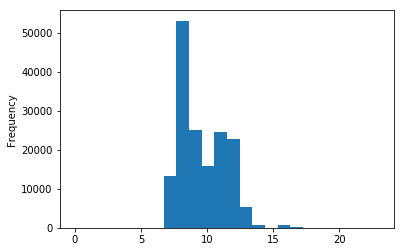

In [14]:
parking_citations_data[parking_citations_data["Description"] == "No Stop/Park Street Cleaning"]["ViolDate"].dropna().map(lambda d: d.hour).plot.hist(bins = 24)
plt.show()


In [15]:
display(parking_citations_data[parking_citations_data["Description"] == "No Stop/Park Street Cleaning"].head(1))

,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,ViolDate,Balance,OpenFine,OpenPenalty,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
Citation,,,,,,,,,,,,,,,,,,
61009545,3CP3670,11,17.0,MD,TOYOT,1500 HOMESTEAD ST,27.0,No Stop/Park Street Cleaning,52.0,2017-07-18 08:43:00,100.0,52.0,0.0,NaT,NaN,NaN,NaN,"1500 HOMESTEAD ST\nBaltimore, MD\n(39.322336, ..."


The histogram points to the street sweeping no park zones being enforceable between 7 AM and 5 PM EST, or 2 AM and Noon UTC.  Upon googling, we found an [article from 2014](https://publicworks.baltimorecity.gov/news/press-releases/2014-03-20-street-sweeping-program-expands-citywide) stating:
> Sweeping hours will occur between 8 a.m. and 4 p.m. on designated sweeping days.

Since the article is a little old, we looked in the general area of an address to see if we could find a sign and we found [the following](https://www.google.com/maps/@39.3221625,-76.5975638,3a,75y,107.25h,84.76t/data=!3m6!1e1!3m4!1suH3q2ihRgmb7C3Y2TOuKHg!2e0!7i13312!8i6656) sign.  Note that the below image was captured by Google in October 2014, so it's not much newer than the article; however, it supports the time frame the article stated.  You have to look pretty close, but the hours on the sign seem to be about 7 AM to 10 AM.  Therefore, it makes sense that the "No Stop/Park Street Cleaning" ticketing would start around 7 AM.  This indicates that the Violation Date is in local time (EST).

<img src="imgs/Street_Sweep_Google_Screenshot.PNG">

This data is supposed to be data from the past two years as well as older outstanding tickets.  So, let's see what years are in the violation dates.

In [16]:
parking_citations_data["ViolDate"].dropna().map(lambda x: x.year).value_counts()

2017    441529
2016    346419
2015    334945
2012    139678
2011    108264
2014     67299
2013     45374
2010       916
2009       333
2005       116
2008        78
2007        71
2006        54
2004        27
Name: ViolDate, dtype: int64

There is a lot of old data going as far back as 2004.  It doesn't surprise me that there is quite a few records from 2010 - 2014; however, we find it interesting that there are more records from 2011 and 2012 than there are from 2014 and 2013.  One would think that there would be more citations in more recent years.  This could indicate the behavior that people don't pay old tickets thinking they have been forgotten about.

Now, we want to explore the columns related to the Tags.  We are assuming that the "Tag" column is the license plate of the car for the citation, "ExpMM" is the month the tag expires, "ExpYY" is the year the tag expires, and the "State" is the state on the tag.  One of the things that is not clear is whether the ExpMM and ExpYY are what is shown on the plate or what is in the system.  For instance, a car owner may have paid for another 2 years of car registration, at least in the case of Maryland, but they may not have put on the updated sticker, so which date is in the system.

We are going to do a quick analysis and clean up of the "Tag" column since that data will be used in conjunction with other datasets.  This is also the easiest way we could try to create a unique identifier for an individual.

As we saw above, there are some empty values in "Tag", "ExpMM" and "ExpYY".  In our case, the "ExpMM" and the "ExpYY" are probably not critical to our analysis, so we're going to ignore these values.  One reason that someone may want to dig into these columns is to determine how much enrichment this data set is getting from the MVA.  For instance, the tag information could be run through the MVA and be enriched with the month/year of expiration; however, it could be the case that the empty ExpMM and ExpYY are out of state vehicles, which would mean that their information might not be accessible to the Baltimore government.

In [17]:
parking_citations_data["Tag"].fillna("UNKNOWN_VALUE").value_counts()[0:50]

NOTAGS T         754
NOTAGSDI         281
NO TAGST         250
UNKNOWN_VALUE    221
5BF6174          158
8767631          150
2AK8974          135
3DGREES          121
WYC5371          112
9BA7231          104
5FRW07           102
61X724           101
LVF001            99
JRA4646           96
5BN7713           92
51763CF           92
2AP4100           92
3BV0242           91
4AJ5964           89
9BL2577           89
7BH1452           88
3CM9052           87
9BF8825           85
4AD8922           85
RI00953           84
2AR1548           83
SMT0178           82
U658113           80
A065284           79
1CG7343           78
U660692           74
VFY5323           74
4CF9473           74
3BX3780           73
7FNC42            72
7CT0727           71
7BL6787           71
1BB2758           71
BAL1146           71
6ZFS977           70
A265057           70
5BZ4532           69
2AK6223           69
7FCS62            68
9AV6860           68
4BP1730           67
1993332           67
5EJS67       

So, two things are obvious from the above results:
1. NOTAGS T, NOTAGSDI, NO TAGST are placeholders for a car without tags.
    * Since these placeholders are all different, this could also mean that the data is from different systems, or different versions of the system.
2. Wow!  For the most part, this is data from the past two years and there are a lot of cars with a lot of tickets from the past two years.
    * This may not be a completely accurate statement would need to be explored further; however, it is out of scope for this project.

First, we want to fill in the empty values and the placeholders for Tag with a common value to indicate the value is unknown.  In our case, we are going to use empty string.

Second, at this point it is also important to note at this point that we have not filtered the data down to the last two rows.  This needs to be done for our purposes because the fact that the older data is for tickets that have not been paid may unintentionally skew the data.

In [32]:
no_tags_values = set(["NOTAGS T", "NOTAGSDI", "NO TAGST"])

def fillInMissingTag(x):
    if not isinstance(x, str):
        return None
    elif x in no_tags_values:
        return None
    else:
        return x
    
parking_citations_data["Tag"] = parking_citations_data["Tag"].map(lambda x: fillInMissingTag(x))

Since there are only a little over 1500 records with unknown tags, which is about 0.1% of the total data, we can go ahead and remove these records during the analysis if the tag is important.

In [40]:
max_datetime = max(parking_citations_data["ViolDate"].dropna())

Since this is supposed to be the last two years of rolling data, we will only use data since 11/22/2017.

In [51]:
parking_citations_data = parking_citations_data[parking_citations_data["ViolDate"] > max_datetime.replace(year = max_datetime.year - 2, hour = 0, minute = 0, second = 0)]

In [52]:
min(parking_citations_data["ViolDate"])

Timestamp('2015-11-22 00:01:00')

### Tag Expiration Dates are 0 or 2

In [19]:
parking_citations_data[parking_citations_data["ExpYY"] == ]

SyntaxError: invalid syntax (<ipython-input-19-4031da6e5b56>, line 1)

In [ ]:
parking_citations_data_withgeo = parking_citations_data[parking_citations_data["Location"].notnull()].copy()

In [ ]:
y=" 5.00 "
float(y)

In [ ]:
def getAddressDataFromLocation(location):
    if not location :
        return (np.nan, np.nan)
    else :
        address = location.split("(")
        if len(address) > 1 :
            return (address[0], "(" + address[1])
        elif ")" in address[0]:
            return(np.nan, "(" + address[0])
        else :
            return(address[0], np.nan)

parking_citations_data_withgeo["GeoPoint"] = parking_citations_data_withgeo["Location"].map(lambda x: getAddressDataFromLocation(x)[1])

In [ ]:
data_with_BLOCK = parking_citations_data_withgeo[parking_citations_data_withgeo.Location.map(lambda x: "BLOCK" in x)]
data_with_BLOCK[data_with_BLOCK.GeoPoint.isnull()]

So there are 50654 rows that don't have Geo and the address has "BLOCK" in it.  I was looking at using geopy https://pypi.python.org/pypi/geopy
to make a call to OpenStreetMap to fix the data, but I don't think it will be able to do that reliably.  For maps, let's ignore these points.  Maybe we'll do a clean up of the addresses (is there a library for this?) and just look at road names for counts/maps/analysis.  Or we can use existing BLOCK address with geopoints to map the ones without geopoints

In [ ]:
parking_citations_data_withgeo = parking_citations_data_withgeo.dropna(subset=["GeoPoint"])


In [35]:
"" == None

False

In [ ]:
import folium

map_2 = folium.Map(location=[39.2904, -76.6122],
                   zoom_start=11)
for s in parking_citations_data_withgeo["GeoPoint"].values[0:60]:
    try:
        s1 = s[1:len(s)-1].split(",")
        latitude = float(s1[0].strip())
        longitude = float(s1[1].strip())
        folium.CircleMarker([latitude, longitude],
                    radius=1,
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(map_2)
    except:
        print(s1)
map_2


In [ ]:
parking_citations_data["Description"].value_counts()

In [ ]:
parking_citations_data["Make"].value_counts()

In [ ]:
parking_citations_data["State"].value_counts()

In [ ]:
parking_citations_data["Tag"].value_counts()

In [ ]:
parking_citations_data[parking_citations_data["Tag"] == "3DGREES"]["Location"].value_counts()

In [ ]:
no_tags_values = set(["NOTAGS T", "NOTAGSDI", "NO TAGST"])
parking_citations_data[~parking_citations_data.Tag.isin(no_tags_values)]["Tag"].value_counts().plot(kind="hist")
plt.show()

In [ ]:
import geojson
baltimore_city_geojson_string = open("data/Baltimore City Line.geojson").read()
baltimore_city_geojson = geojson.loads(baltimore_city_geojson_string)

minLat = float("inf")
maxLat = float("-inf")
minLong = float("inf")
maxLong = float("-inf")

#Longitude, Latitude
for coordinate in baltimore_city_geojson["features"][0]["geometry"]["coordinates"][0]:
    print(coordinate)
    lat = coordinate[1]
    if(lat < minLat):
        minLat = lat
    if(lat > maxLat):
        maxLat = lat
    long = coordinate[0]
    if(long < minLong):
        minLong = long
    if(long > maxLong):
        maxLong = long
print(str(minLat) + " " + str(maxLat))
print(str(minLong) + " " + str(maxLong))